# Load model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from skimage.metrics import structural_similarity as ssim


def load_image(path):
    return np.array(Image.open(path))


def plot_sample(lr, sr):
    plt.figure(figsize=(20, 30))

    images = [lr, sr]
    titles = ['LR', f'SR (x{sr.shape[0] // lr.shape[0]})']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(2, 1, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

def resolve_single(model, lr):
    return resolve(model, tf.expand_dims(lr, axis=0))[0]

def resolve(model, lr_batch):
    lr_batch = tf.cast(lr_batch, tf.float32)
    sr_batch = model(lr_batch)
    sr_batch = tf.clip_by_value(sr_batch, 0, 255)
    sr_batch = tf.round(sr_batch)
    sr_batch = tf.cast(sr_batch, tf.uint8)
    return sr_batch

def psnr(target,ref):
    target_data=target.astype(float)
    ref_data=ref.astype(float)
    diff=ref_data-target_data
    diff=diff.flatten('C')
    rmse=np.sqrt(np.mean(diff**2.))
    return 20*np.log10(255./rmse)

def mse(target,ref):
    err=np.sum((target.astype('float')-ref.astype('float'))**2)
    err=err/float(target.shape[0]*target.shape[1])
    return err

def compare_images(target,ref):
    scores=[]
    scores.append(psnr(target,ref))
    scores.append(mse(target,ref))
    scores.append(ssim(target,ref,multichannel=True))#multichannel so that it can handle 3Dor 3 channel images RGB/BGR 
    
    return scores

In [ ]:
import os
def load_image(path):
    ''' type is Train or Test '''
    cwd = os.getcwd()
    x = cwd.split("\\")
    cwd = ''
    for i in range(len(x)-1):
        cwd = cwd+x[i]+'/'

    return np.array(Image.open(path))

In [53]:
import os
cwd = os.getcwd()

# Print the current working directory
print((cwd))
x = cwd.split("\\")
cwd = ''
for i in range(len(x)-1):
    cwd = cwd+x[i]+'/'
print(cwd)

path = "Img_LR.jpg"
lr = Image.open(cwd+'Licence_Plate_images/Train/1-6732.jpg')
lr.show()

c:\Users\THETANG\Documents\GitHub\ML-Project\SRGAN_model
c:/Users/THETANG/Documents/GitHub/ML-Project/


In [2]:
from srgan import generator

model = generator()
model.load_weights('weights/gan_generator.h5')


path = "Img_LR.jpg"
lr = load_image(path)
lr = lr[:,:,:3]
print(lr.shape)



(703, 1267, 3)


In [3]:
sr = resolve_single(model, lr)

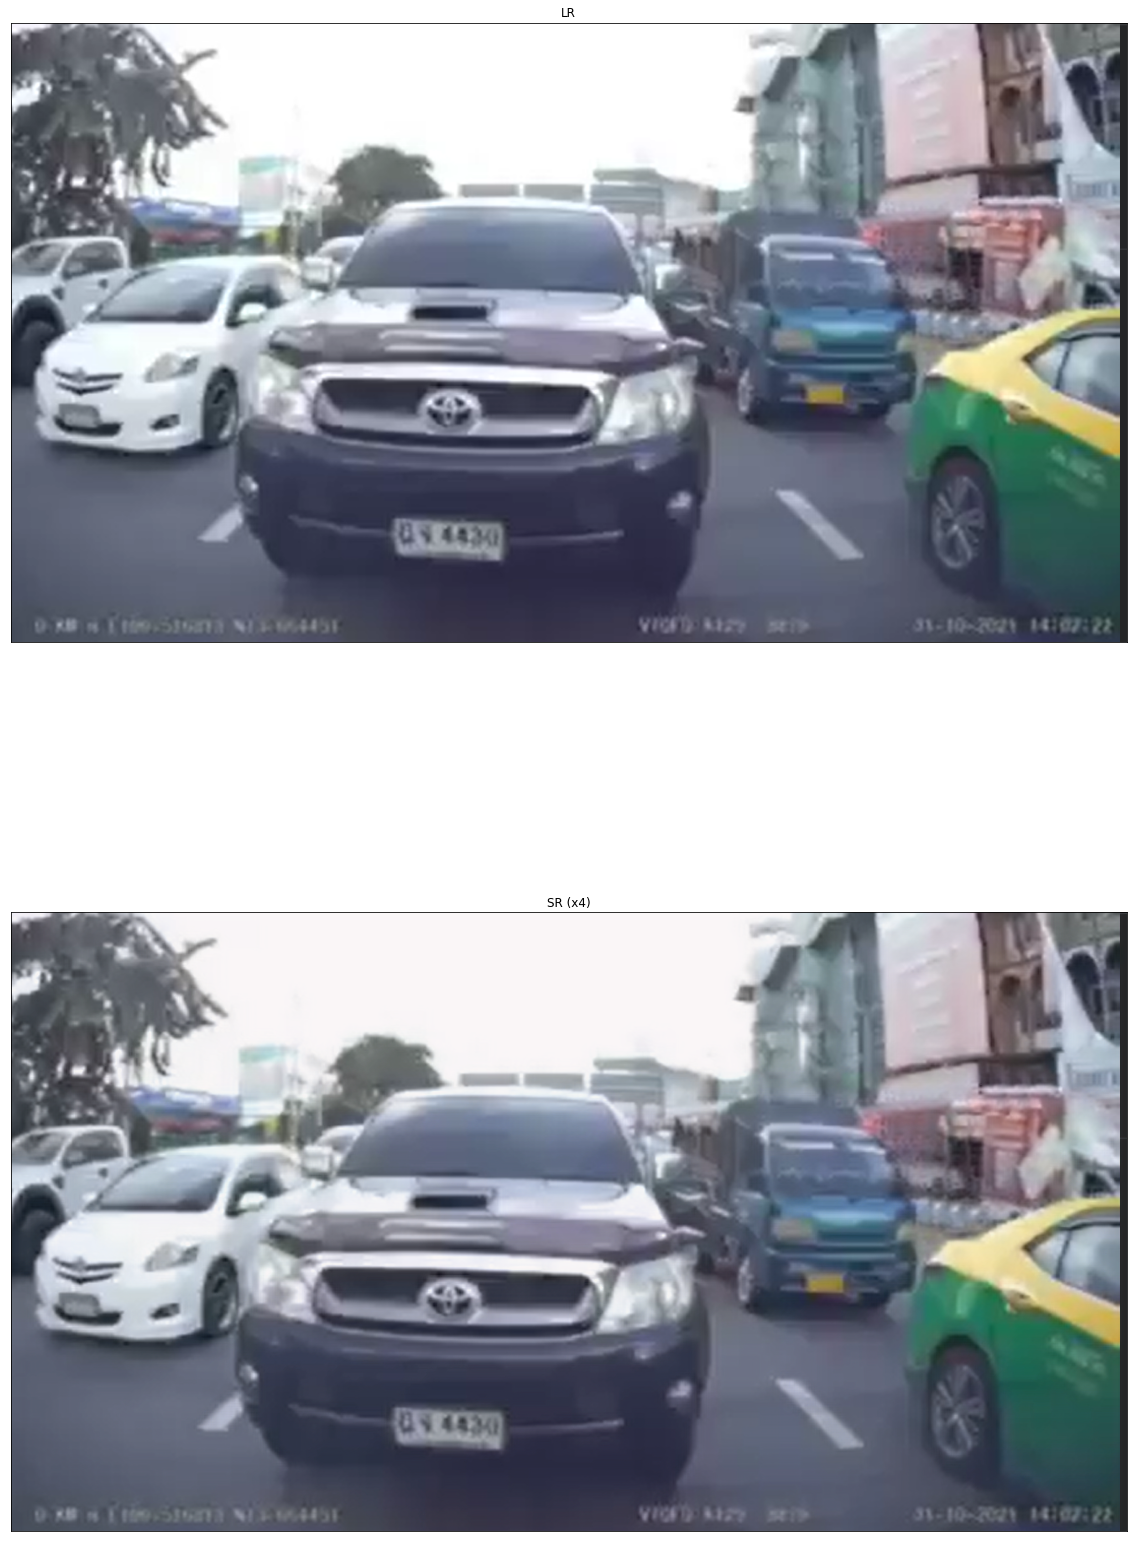

In [4]:
plot_sample(lr, sr)

In [8]:
print(type(sr.numpy()))

<class 'numpy.ndarray'>


In [14]:

lr_4x = np.zeros((lr.shape[0]*4,lr.shape[1]*4,lr.shape[2]))
print(lr.shape, lr_4x.shape, sr.shape)

#scores = compare_images(sr.numpy(), lr)

(703, 1267, 3) (2812, 5068, 3) (2812, 5068, 3)


In [16]:
im = Image.fromarray(sr.numpy())
im.save("SR.jpeg")